In [1]:
import pandas as pd

In [14]:
# Read the data from the CSV file
data = pd.read_csv(r'data\owid-covid-data.csv')


In [16]:
# Summary
from scipy.stats import skew, kurtosis
import numpy as np


# 2. 篩選數值型欄位 + 國家欄位
numeric_data = data.select_dtypes(include=[np.number])
numeric_data['iso_code'] = data['iso_code']  # 假設國家欄位名稱為 'country'

# 3. 篩選特定國家
filtered_data = numeric_data[numeric_data['iso_code'].isin(["MYS", "ARG", "MEX", "JPN", "CAN", "THA", "VNM", "TWN", "CHN", "SGP"])]

# 4. 自定義函式：計算統計摘要
def generate_country_summary(df):
    summary = df.groupby('iso_code').agg(
        平均數=('new_cases', 'mean'),
        標準差=('new_cases', 'std'),
        中位數=('new_cases', 'median'),
        偏度=('new_cases', lambda x: skew(x.dropna())),
        峰度=('new_cases', lambda x: kurtosis(x.dropna())),
        最小值=('new_cases', 'min'),
        最大值=('new_cases', 'max'),
        個數=('new_cases', 'count')
    )
    return summary

# 5. 生成統計摘要表
summary_table = generate_country_summary(filtered_data)
summary_table

,平均數,標準差,中位數,偏度,峰度,最小值,最大值,個數
iso_code,,,,,,,,
ARG,12188.714870,19481.729266,7208.0,3.965479,18.167455,0.0,139853.0,733
CAN,4313.077620,6937.003948,2369.0,4.105400,20.524522,0.0,58934.0,773
CHN,143.095979,728.440345,24.0,13.553038,243.952479,0.0,15133.0,771
JPN,6909.759379,17997.756958,1076.0,3.697184,13.222113,0.0,104345.0,773
MEX,7536.488467,10779.954209,5045.0,4.913866,33.436388,0.0,109895.0,737
MYS,4662.998703,6693.821917,2063.0,2.005811,3.546322,0.0,33406.0,771
SGP,1060.366106,3201.331699,49.0,4.819003,25.127312,0.0,26032.0,773
THA,3920.607513,6146.599882,156.0,1.812514,3.276475,0.0,42617.0,772
TWN,26.976654,82.626539,4.0,5.308566,31.166285,0.0,723.0,771


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166326 entries, 0 to 166325
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    166326 non-null  object 
 1   continent                                   156370 non-null  object 
 2   location                                    166326 non-null  object 
 3   date                                        166326 non-null  object 
 4   total_cases                                 163293 non-null  float64
 5   new_cases                                   163133 non-null  float64
 6   new_cases_smoothed                          161150 non-null  float64
 7   total_deaths                                145451 non-null  float64
 8   new_deaths                                  145487 non-null  float64
 9   new_deaths_smoothed                         143390 non-null  float64
 

In [6]:
a = list[data["iso_code"].value_counts().head(22)]
a


list[iso_code
ARG         795
MEX         795
THA         792
TWN         780
CHN         774
OWID_ASI    774
OWID_NAM    774
MAC         774
KOR         774
OWID_UMC    774
OWID_LMC    774
JPN         774
OWID_HIC    774
OWID_WRL    774
USA         774
OWID_EUN    773
OWID_EUR    773
CAN         773
VNM         773
SGP         773
HKG         773
MYS         772
Name: count, dtype: int64]

In [19]:
len(data["iso_code"].unique())

238

In [7]:
twn_data = data[data["iso_code"] == "TWN"]
arg_data = data[data["iso_code"] == "ARG"]
mex_data = data[data["iso_code"] == "MEX"]
tha_data = data[data["iso_code"] == "THA"]
usa_data = data[data["iso_code"] == "USA"]

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

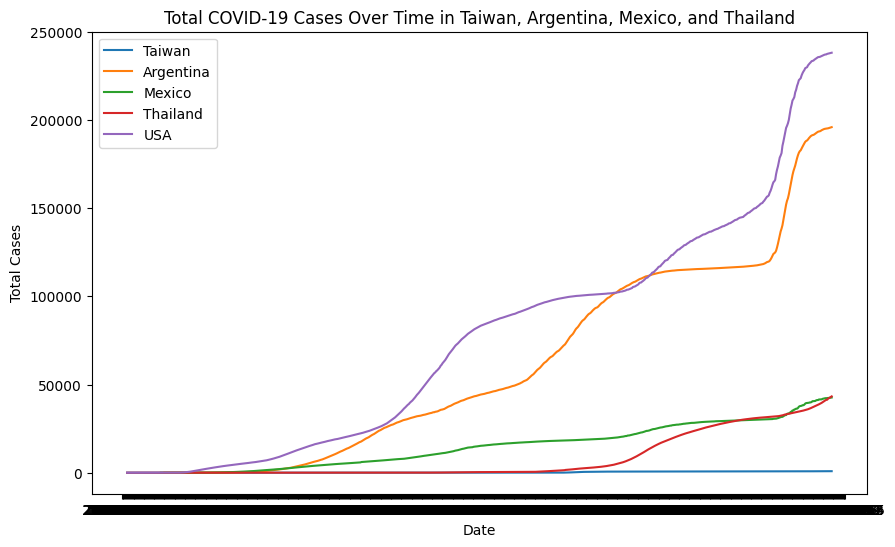

In [8]:
# Draw a line plot of total cases over time
plt.figure(figsize=(10, 6))
sns.lineplot(x="date", y="total_cases_per_million", data=twn_data, label="Taiwan")
sns.lineplot(x="date", y="total_cases_per_million", data=arg_data, label="Argentina")
sns.lineplot(x="date", y="total_cases_per_million", data=mex_data, label="Mexico")
sns.lineplot(x="date", y="total_cases_per_million", data=tha_data, label="Thailand")
sns.lineplot(x="date", y="total_cases_per_million", data=usa_data, label="USA")
plt.title("Total COVID-19 Cases Over Time in Taiwan, Argentina, Mexico, and Thailand")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.legend()
plt.show()

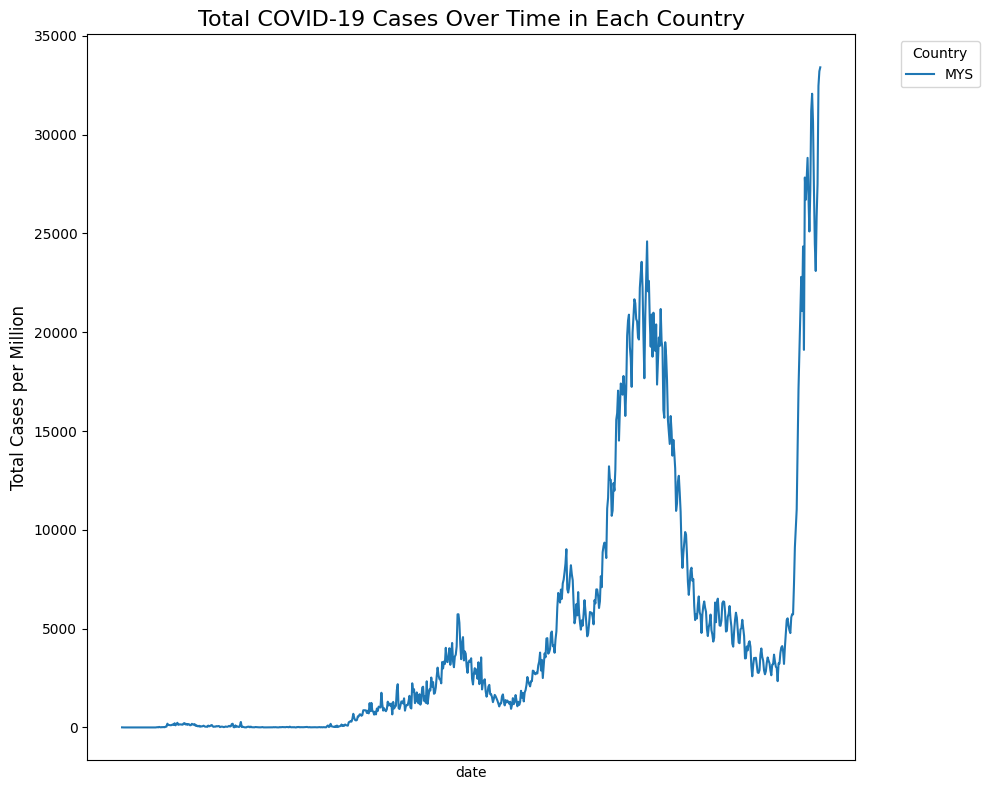

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

data["date"] = pd.to_datetime(data["date"])
data = data[data["date"] <= "2022-03-05"]

# 獲取前 20 個國家的列表
region_list = data["iso_code"].unique()[:30]

# 設置圖形大小
plt.figure(figsize=(10, 8))
b = ["MYS"]#["USA", "ARG", "MEX", "JPN", "CAN", "THA", "VNM", "TWN", "CHN", "SGP"] 
# 遍歷每個國家，將數據劃在同一張圖上
for region in b:
    region_data = data[data["iso_code"] == region]
    sns.lineplot(x="date", y="new_cases", data=region_data, label=region, markers=True)

# 添加標題和標籤
plt.title("Total COVID-19 Cases Over Time in Each Country", fontsize=16)
plt.xticks([])

plt.ylabel("Total Cases per Million", fontsize=12)

# 添加圖例
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')

# 顯示圖形
plt.tight_layout()
plt.show()
